*Seashells basic installation and tutorial*

In [23]:
import numpy as np
import pandas as pd
import scanpy as sc
import SEACells as sea

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Some plotting aesthetics
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100

In [25]:
# adata = sc.datasets.pbmc3k_processed()
# adata

adata = sc.read_h5ad('./write/GSE148218_processed.h5ad')
adata

KeyboardInterrupt: 

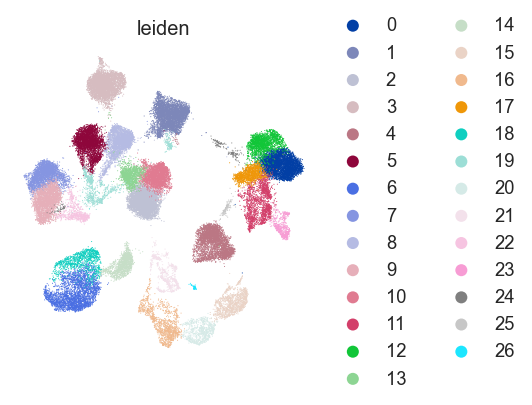

In [ ]:
sc.pl.scatter(adata, basis='umap', color='leiden', frameon=False)


In [ ]:
# Normalize cells, log transform and compute highly variable genes
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=1500)

/Users/Ali/anaconda3/envs/seashells/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
sc.tl.pca(adata, n_comps=50, use_highly_variable=True)
adata

AnnData object with n_obs × n_vars = 53007 × 22130
    obs: 'patient_id', 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'n_counts'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
## User defined parameters

## Core parameters 
n_SEACells = 80
build_kernel_on = 'X_pca' # key in ad.obsm to use for computing metacells
                          # This would be replaced by 'X_svd' for ATAC data

## Additional parameters
n_waypoint_eigs = 10 # Number of eigenvalues to consider when initializing metacells

In [ ]:
model = sea.core.SEACells(adata,build_kernel_on=build_kernel_on,n_SEACells=n_SEACells, n_waypoint_eigs=n_waypoint_eigs, convergence_epsilon = 1e-5)

Welcome to SEACells!


In [ ]:
model.construct_kernel_matrix()
M = model.kernel_matrix


Computing kNN graph using scanpy NN ...


/Users/Ali/anaconda3/envs/seashells/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/Ali/anaconda3/envs/seashells/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/Ali/anaconda3/envs/seashells/lib/python3.11/site-packages/uma

Computing radius for adaptive bandwidth kernel...


  0%|          | 0/53007 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/53007 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/53007 [00:00<?, ?it/s]

Constructing CSR matrix...


/Users/Ali/anaconda3/envs/seashells/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


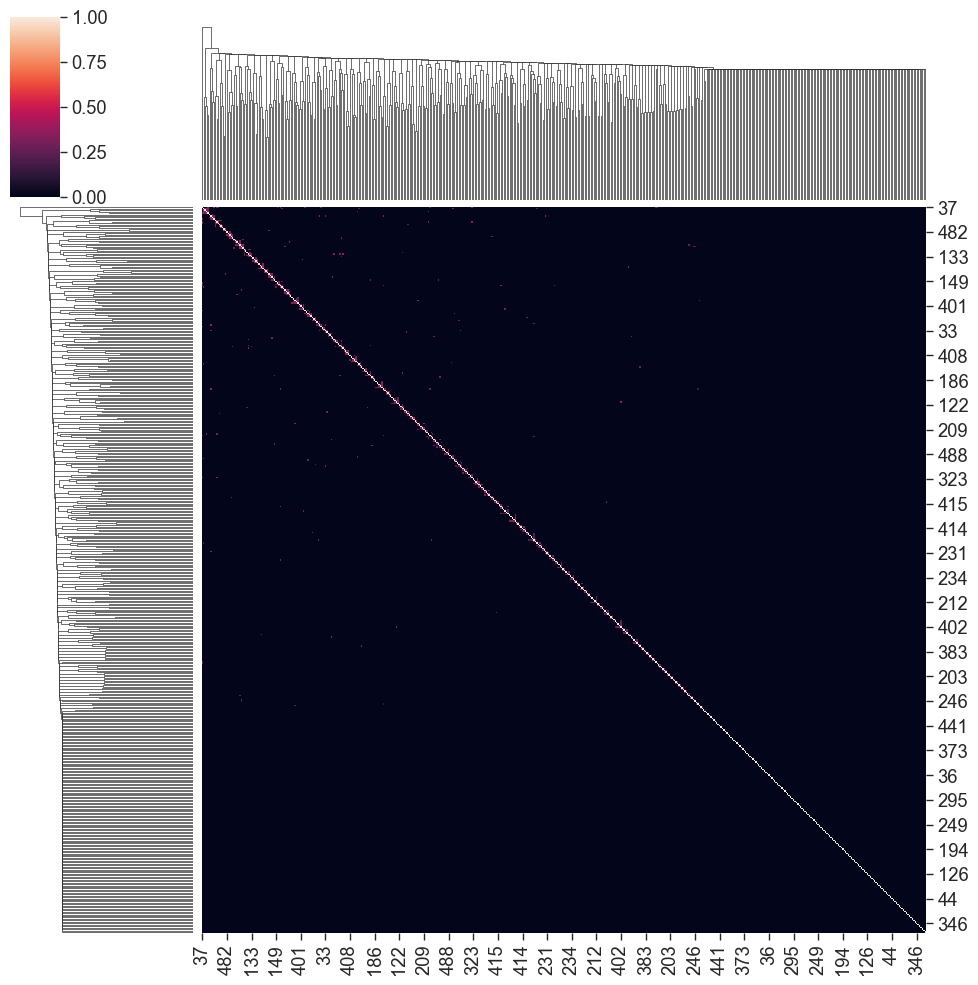

In [ ]:
sns.clustermap(M.toarray()[:500,:500])

In [ ]:
# Initialize archetypes
model.initialize_archetypes()

Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
Determing nearest neighbor graph...
Done.
Sampling waypoints ...
Done.
Selecting 72 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████| 18/18 [00:01<00:00, 14.50it/s]

Selecting 8 cells from greedy initialization.


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

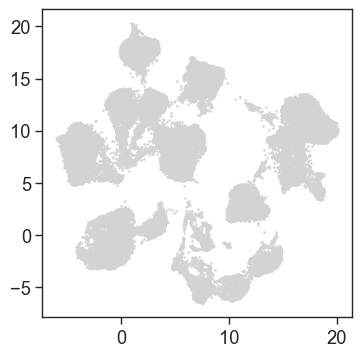

In [ ]:
# Plot the initilization to ensure they are spread across phenotypic space
sea.plot.plot_initialization(adata, model)

In [ ]:
model.fit(min_iter=10, max_iter=50)

Randomly initialized A matrix.
Setting convergence threshold at 0.00432
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Converged after 19 iterations.


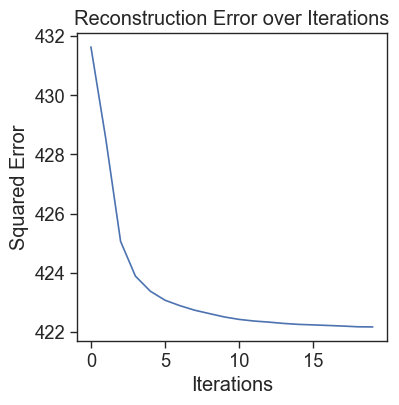

In [ ]:
# Check for convergence 
model.plot_convergence()

START HERE

In [4]:
import numpy as np
import pandas as pd
import scanpy as sc
import SEACells 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Some plotting aesthetics
%matplotlib inline

sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100

In [6]:
adata = sc.read_h5ad("/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/GSE148218_Scanpy_Milo_SEACells.h5ad")
adata

/Users/Ali/anaconda3/envs/seashells/lib/python3.11/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 53007 × 22130
    obs: 'patient_id', 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'SEACell', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'nhood_adata', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'nhoods'
    obsp: 'connectivities', 'distances'

In [7]:
adata.obs[['SEACell']].head()


,SEACell
GSM4456251_ALL1_AAACCTGAGAGATGAG-1,SEACell-70
GSM4456251_ALL1_AAACCTGAGCACACAG-1,SEACell-27
GSM4456251_ALL1_AAACCTGAGGATGGAA-1,SEACell-67
GSM4456251_ALL1_AAACCTGAGGGTGTGT-1,SEACell-46
GSM4456251_ALL1_AAACCTGCACAACTGT-1,SEACell-74


In [8]:
model.get_hard_assignments().head()


NameError: name 'model' is not defined

/var/folders/y6/x977321s1pq0y12wyvz_gfq80000gq/T/ipykernel_32008/2761727437.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)


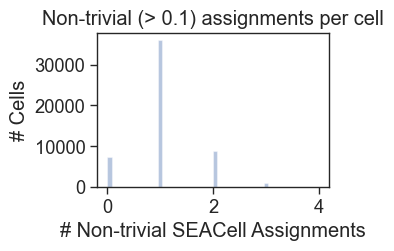

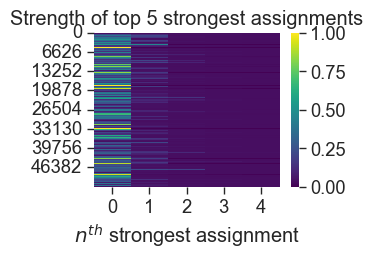

In [ ]:
plt.figure(figsize=(3,2))
sns.distplot((model.A_.T > 0.1).sum(axis=1), kde=False)
plt.title(f'Non-trivial (> 0.1) assignments per cell')
plt.xlabel('# Non-trivial SEACell Assignments')
plt.ylabel('# Cells')
plt.show()

plt.figure(figsize=(3,2))
b = np.partition(model.A_.T, -5)    
sns.heatmap(np.sort(b[:,-5:])[:, ::-1], cmap='viridis', vmin=0)
plt.title('Strength of top 5 strongest assignments')
plt.xlabel('$n^{th}$ strongest assignment')
plt.show()

In [ ]:
labels,weights = model.get_soft_assignments()


In [ ]:
labels.head()


,0,1,2,3,4
index,,,,,
AAACCTGAGAGATGAG-1,ACATGGTTCACGCATA-1,TAAGCGTTCACAGTAC-1,CACAAACCAGTCGATT-1,ACCAGTATCTCCAGGG-1,TTCGAAGAGTGTTAGA-1
AAACCTGAGCACACAG-1,ACGCAGCTCTGCGGCA-1,TTCGAAGAGTGTTAGA-1,GCGCAACAGGAGTCTG-1,GACTAACCATGGTTGT-1,TACACGATCACGGTTA-1
AAACCTGAGGATGGAA-1,CACTCCACACCTATCC-1,GACTAACCATGGTTGT-1,TGTACAGTCTCACTCG-1,CAATTTCAGCGGTATG-1,TACTTACCATCGACGC-1
AAACCTGAGGGTGTGT-1,GCACTCTTCAGTGCAT-1,TACTTACCATCGACGC-1,CCGTGGACACCCATTC-1,GGCTGGTCATGCAATC-1,CCGTGGATCTCAAGTG-1
AAACCTGCACAACTGT-1,TAAGCGTTCACAGTAC-1,TTCGAAGAGTGTTAGA-1,GCTGGGTCACTGTTAG-1,ACATGGTTCACGCATA-1,GCACTCTCAGGGTATG-1


In [ ]:
SEACell_ad = sea.core.summarize_by_SEACell(adata, SEACells_label='SEACell', summarize_layer='raw')
SEACell_ad


  0%|          | 0/80 [00:00<?, ?it/s]

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
SEACell_soft_ad = sea.core.summarize_by_soft_SEACell(adata, model.A_, celltype_label='celltype',summarize_layer='raw', minimum_weight=0.05)
SEACell_soft_ad


NameError: name 'sea' is not defined

In [ ]:
SEACell_soft_ad.obs.head()


In [ ]:
sc.pp.normalize_total
sc.pp.log1p

/Users/Ali/anaconda3/envs/seashells/lib/python3.11/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/Users/Ali/anaconda3/envs/seashells/lib/python3.11/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


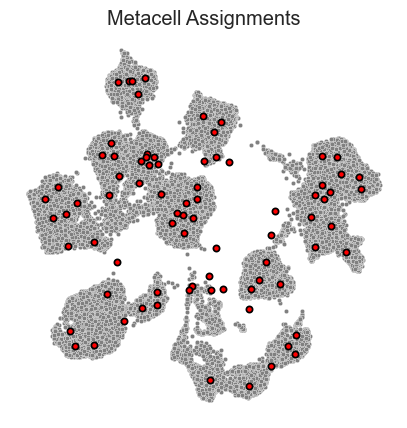

In [10]:
SEACells.plot.plot_2D(adata, key='X_umap', colour_metacells=False)


/Users/Ali/anaconda3/envs/seashells/lib/python3.11/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/Users/Ali/anaconda3/envs/seashells/lib/python3.11/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


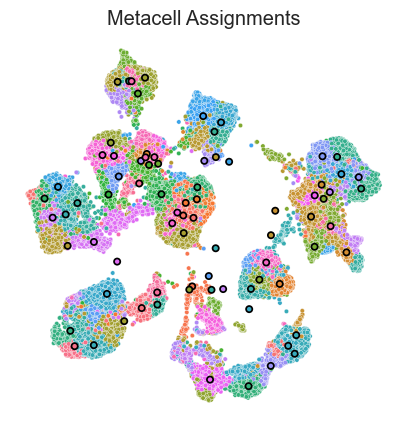

In [11]:
SEACells.plot.plot_2D(adata, key='X_umap', colour_metacells=True)


In [15]:
adata.obs[['SEACell']].head()

,SEACell
GSM4456251_ALL1_AAACCTGAGAGATGAG-1,SEACell-70
GSM4456251_ALL1_AAACCTGAGCACACAG-1,SEACell-27
GSM4456251_ALL1_AAACCTGAGGATGGAA-1,SEACell-67
GSM4456251_ALL1_AAACCTGAGGGTGTGT-1,SEACell-46
GSM4456251_ALL1_AAACCTGCACAACTGT-1,SEACell-74


In [33]:
def plot_2D_adapted(
    ad,
    key="X_umap",
    colour_metacells=True,
    title="Metacell Assignments",
    save_as=None,
    show=True,
    cmap="Set2",
    figsize=(5, 5),
    SEACell_size=20,
    cell_size=10,
):
    """Plot 2D visualization of metacells using the embedding provided in 'key'.

    :param ad: annData containing 'Metacells' label in .obs
    :param key: (str) 2D embedding of data. Default: 'X_umap'
    :param colour_metacells: (bool) whether to colour cells by metacell assignment. Default: True
    :param title: (str) title for figure
    :param save_as: (str or None) file name to which figure is saved
    :param cmap: (str) matplotlib colormap for metacells. Default: 'Set2'
    :param figsize: (int,int) tuple of integers representing figure size
    """
    umap = pd.DataFrame(ad.obsm[key]).set_index(ad.obs_names).join(ad.obs["SEACell"])
    umap["SEACell"] = umap["SEACell"].astype("category")
    mcs = umap.groupby("SEACell").mean().reset_index()

    plt.figure(figsize=figsize)
    if colour_metacells:
        sns.scatterplot(
            x=0, y=1, hue="SEACell", data=umap, s=cell_size, cmap=cmap, legend="auto"
        )
        sns.scatterplot(
            x=0,
            y=1,
            s=SEACell_size,
            hue="SEACell",
            data=mcs,
            cmap=cmap,
            edgecolor="black",
            linewidth=1.25,
            legend="auto",
        )
    else:
        sns.scatterplot(
            x=0, y=1, color="grey", data=umap, s=cell_size, cmap=cmap, legend="auto"
        )
        sns.scatterplot(
            x=0,
            y=1,
            s=SEACell_size,
            color="red",
            data=mcs,
            cmap=cmap,
            edgecolor="black",
            linewidth=1.25,
            legend="auto",
            )

        plt.xlabel(f"{key}-0")
        plt.ylabel(f"{key}-1")
        plt.title(title)
        ax = plt.gca()
        ax.set_axis_off()

        if save_as is not None:
            plt.savefig(save_as, dpi=150, transparent=True)
        if show:
            plt.show()
        plt.close()

/Users/Ali/anaconda3/envs/seashells/lib/python3.11/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/Users/Ali/anaconda3/envs/seashells/lib/python3.11/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


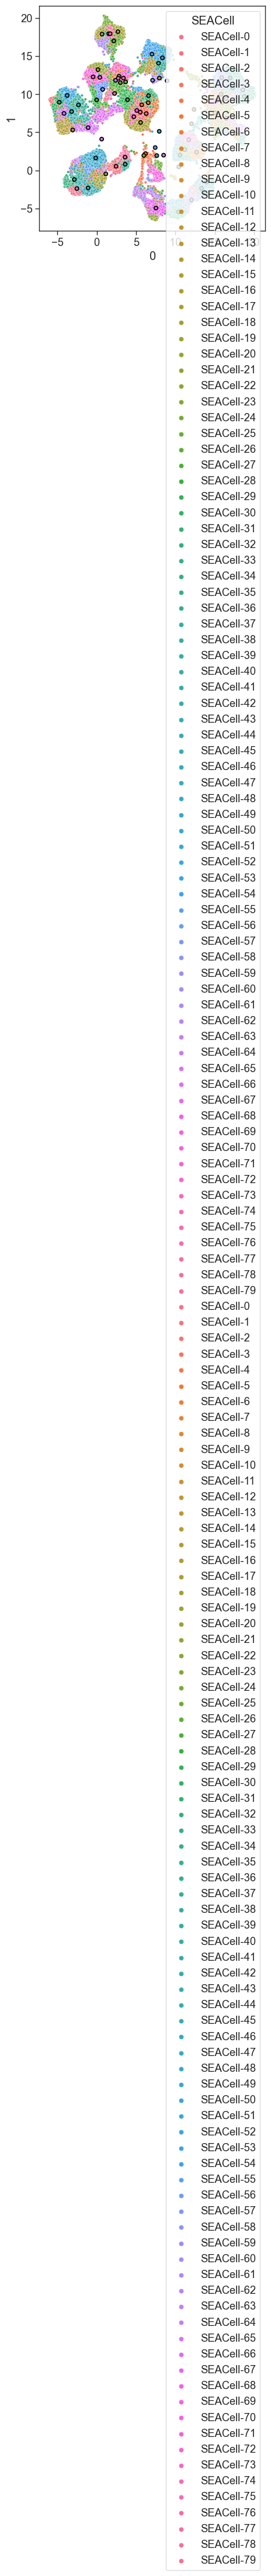

In [42]:
plot_2D_adapted(adata, key='X_umap', colour_metacells=True)

/Users/Ali/anaconda3/envs/seashells/lib/python3.11/site-packages/SEACells/plot.py:130: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(label_df.groupby("SEACell").count().iloc[:, 0], bins=bins)


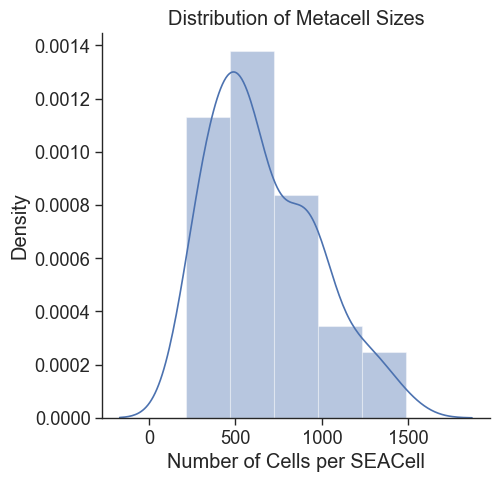

,size
SEACell,
SEACell-0,402
SEACell-1,514
SEACell-2,479
SEACell-3,1055
SEACell-4,276
...,...
SEACell-75,552
SEACell-76,478
SEACell-77,257


In [43]:
SEACells.plot.plot_SEACell_sizes(adata, bins=5)

In [44]:
# adata
# adata.write_h5ad("/Users/Ali/Desktop/Mehtonen et al./GSE148218_RAW/GSE148218_processed.h5ad", compression="gzip")